In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import datetime as dt
from wordcloud import WordCloud,STOPWORDS

In [2]:
df=pd.read_csv('cleaned-BA-reviews (2).csv',index_col=0)

In [3]:
df.head()

,review,stars,date,country,verified,corpus
0,✅ Trip Verified | Although we had mobile boa...,5,2025-07-26,(United States),True,although mobile boarding pass checked luggage ...
1,✅ Trip Verified | Booking through the Britis...,9,2025-07-25,(United Kingdom),True,booking british airway website straightforward...
2,✅ Trip Verified | Abysmal experience with fli...,2,2025-07-23,(United Kingdom),True,abysmal experience flight initially delayed ca...
3,✅ Trip Verified | Check in at Miami was quick...,4,2025-07-22,(United Kingdom),True,check miami quick easy american airline lounge...
4,✅ Trip Verified | Our BA Airbus 380 premium e...,6,2025-07-17,(United States),True,ba airbus premium economy section outdated loo...


In [4]:
df= df.reset_index(drop=True)
df.head()

,review,stars,date,country,verified,corpus
0,✅ Trip Verified | Although we had mobile boa...,5,2025-07-26,(United States),True,although mobile boarding pass checked luggage ...
1,✅ Trip Verified | Booking through the Britis...,9,2025-07-25,(United Kingdom),True,booking british airway website straightforward...
2,✅ Trip Verified | Abysmal experience with fli...,2,2025-07-23,(United Kingdom),True,abysmal experience flight initially delayed ca...
3,✅ Trip Verified | Check in at Miami was quick...,4,2025-07-22,(United Kingdom),True,check miami quick easy american airline lounge...
4,✅ Trip Verified | Our BA Airbus 380 premium e...,6,2025-07-17,(United States),True,ba airbus premium economy section outdated loo...


1. What is the avg overall rating givn to the british airways?

In [5]:
df.stars.mean()

np.float64(4.12)

2.What is the counts for each ratings

Text(0.5, 1.0, 'count for each ratings')

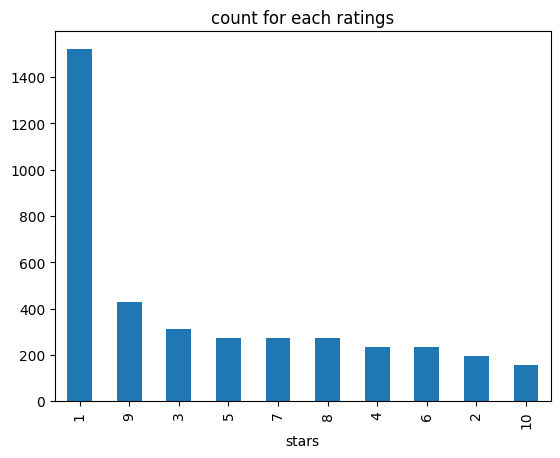

In [6]:
df.stars.value_counts().plot(kind='bar')
plt.xlabel=('rating')
plt.ylabel=('count')
plt.title('count for each ratings')

In [7]:
df_ratings= pd.DataFrame(df['stars'].value_counts().reset_index())
pct_values= (df_ratings.stars.values/df_ratings.stars.values.sum()*100).tolist()
pct_values=[round(x,2) for x in pct_values]
df_ratings['pct_values']=pct_values
df_ratings

,stars,count,pct_values
0,1,1521,1.82
1,9,429,16.36
2,3,312,5.45
3,5,273,9.09
4,7,273,12.73
5,8,273,14.55
6,4,234,7.27
7,6,234,10.91
8,2,195,3.64
9,10,156,18.18


/tmp/ipython-input-1837380505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=df_ratings.stars,y=df_ratings['count'],data=df_ratings,palette=clrs)


Text(0, 0.5, 'counts')

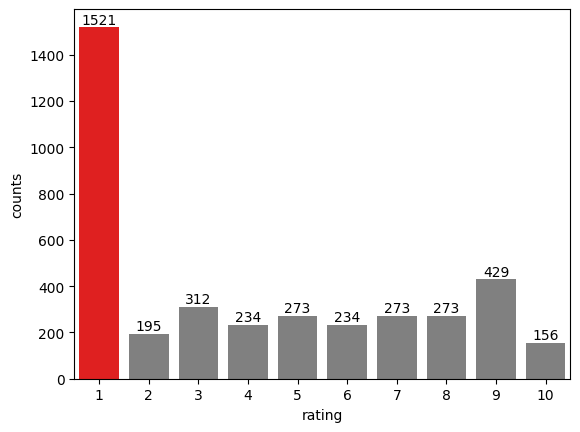

In [8]:
clrs=['Red' if (x==max(df_ratings['count'])) else 'grey' for x in df_ratings['count']]
ax=sns.barplot(x=df_ratings.stars,y=df_ratings['count'],data=df_ratings,palette=clrs)
for container in ax.containers:
   ax.bar_label(container)
ax.set_xlabel('rating')
ax.set_ylabel('counts')

3. Which country most review comes from?

In [9]:
df_country_ratings=pd.DataFrame(df.country.value_counts().reset_index())
df_country_ratings

,country,count
0,(United Kingdom),2028
1,(United States),819
2,(Australia),234
3,(South Africa),156
4,(Switzerland),117
5,(India),117
6,(Germany),78
7,(Netherlands),78
8,(Canada),78
9,(Sweden),39


<Axes: xlabel='country'>

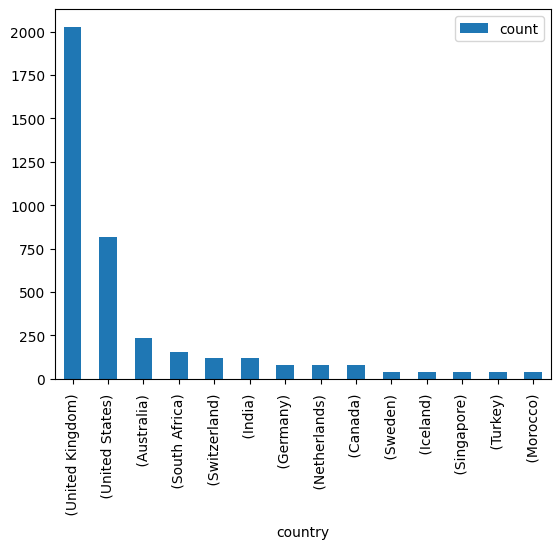

In [10]:
df_country_ratings.plot(kind='bar',x='country')

In [11]:
df_country_ratings=pd.DataFrame(df.groupby('country')['stars'].mean().sort_index(ascending=False)).reset_index()
df_country_ratings

,country,stars
0,(United States),3.047619
1,(United Kingdom),4.961538
2,(Turkey),3.000000
3,(Switzerland),4.000000
4,(Sweden),7.000000
5,(South Africa),1.500000
6,(Singapore),1.000000
7,(Netherlands),1.000000
8,(Morocco),1.000000
9,(India),2.000000


Text(0.5, 1.0, 'Top 12 country with avg highest ratings provided to british airways')

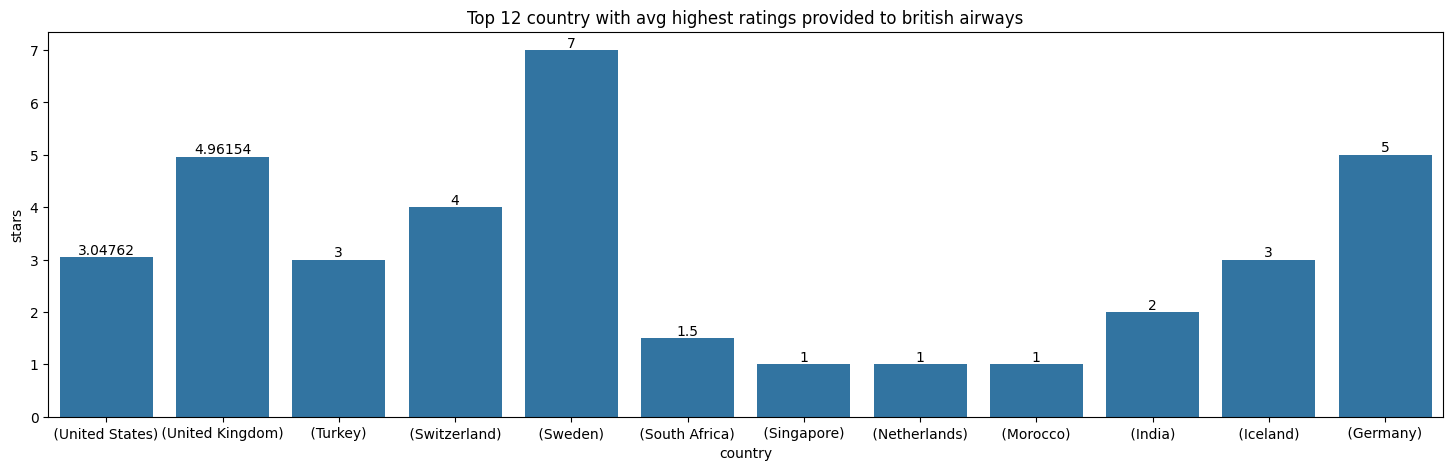

In [12]:
fig,ax=plt.subplots(figsize=(18,5))
ax1=sns.barplot(x='country',y='stars',data=df_country_ratings[:12],ax=ax)
ax.bar_label(ax.containers[0])
ax.set_title('Top 12 country with avg highest ratings provided to british airways')


4. Time series Analysis

In [13]:
df.date=pd.to_datetime(df.date)

In [14]:
fig=px.line(df,x='date',y='stars')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Not much can be inferred at this point as the dates we have are the when the customers posted there review which does not take into account as the actual fight date. Hence no particular signufican trend is visible for the plot

5.Word Frequency

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

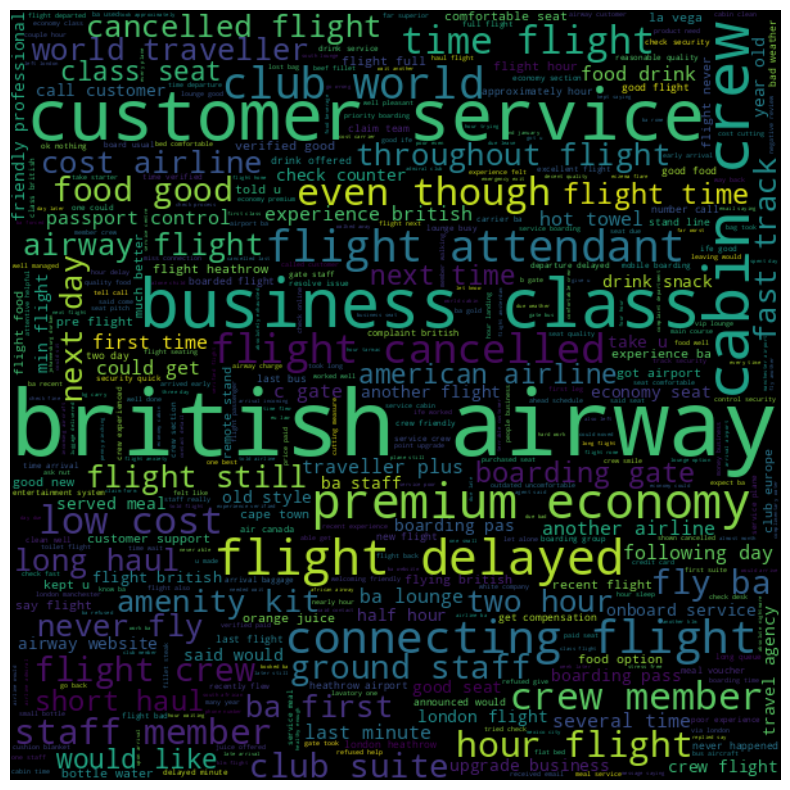

In [16]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stop_words = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stop_words).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words words that dont not set the idea of wheather the review is positive or negative. For example words like 'passenger', 'flight',etc. does not add conclusion value hence we can include them in stopwords list.

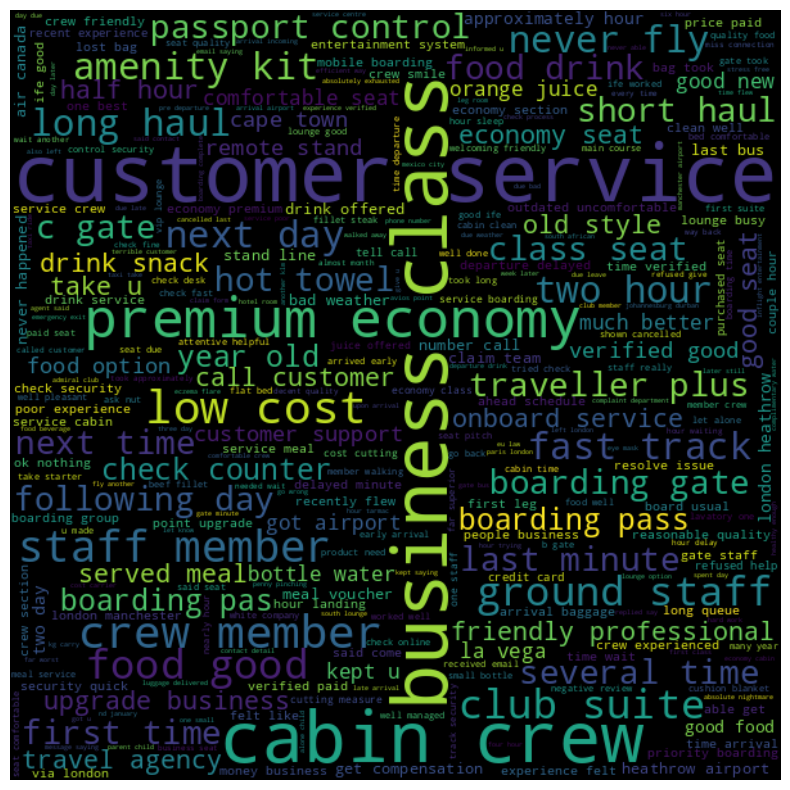

In [17]:
import nltk
from nltk.corpus import stopwords
reviews=" ".join(df.corpus)
plt.figure(figsize=(20,10))
stopwords=set(stopwords.words('english'))
stopwords.update(['ba','flight','british','europe','following day', 'would','airway','airline','plane','could','told','even','world','aircraft'])
wordcloud=WordCloud(height=600,width=600,max_font_size=100,max_words=300,stopwords=stopwords).generate(reviews)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Word Frequency with N-gram

<Axes: >

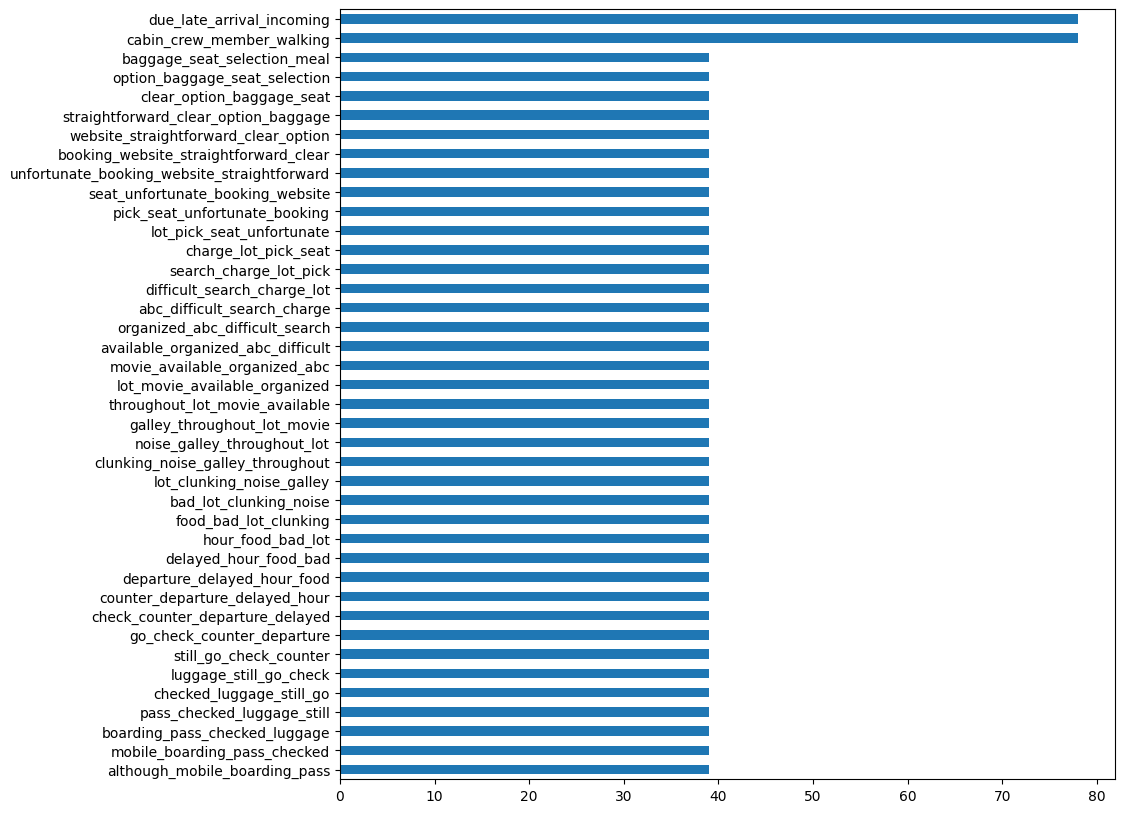

In [18]:
import nltk.collocations as collocations
from nltk import FreqDist , bigrams

reviews= ' '.join(df.corpus)
words=reviews.split(" ")
new_words= [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams):
  from nltk import ngrams

  #generate bigrams
  ngrams=ngrams(new_words,number_of_ngrams)

  #creating FredDist
  ngram_fd=FreqDist(ngrams).most_common(40)

  ##sort value by highest frequency
  ngrams_sorted= {k:v for k,v in sorted(ngram_fd,key=lambda item:item[1])}

  #join bigram tokens with '_' + maintain sorting
  ngram_joined= {'_'.join(k):v for k,v in sorted(ngram_fd,key=lambda item:item[1])}

  ##Convert to pandas series for easy platting
  ngrams_freqdist=pd.Series(ngram_joined)
  plt.figure(figsize=(10,10))
  ax=ngrams_freqdist.plot(kind='barh')
  return ax

get_freq_dist(new_words,4)



We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [19]:
ratings_1_3= df[df.stars.isin([1,2,3])]
ratings_4_6= df[df.stars.isin([4,5,6])]
ratings_7_8= df[df.stars.isin([7,8,9,10])]


In [20]:
reviews_1_3= ' '.join(ratings_1_3.corpus)
reviews_4_6= ' '.join(ratings_4_6.corpus)
reviews_7_10= ' '.join(ratings_7_8.corpus)

#split the text of all reviews into a list of words
words_1_3= reviews_1_3.split(' ')
words_4_6= reviews_4_6.split(' ')
words_7_10= reviews_7_10.split(' ')


<Axes: >

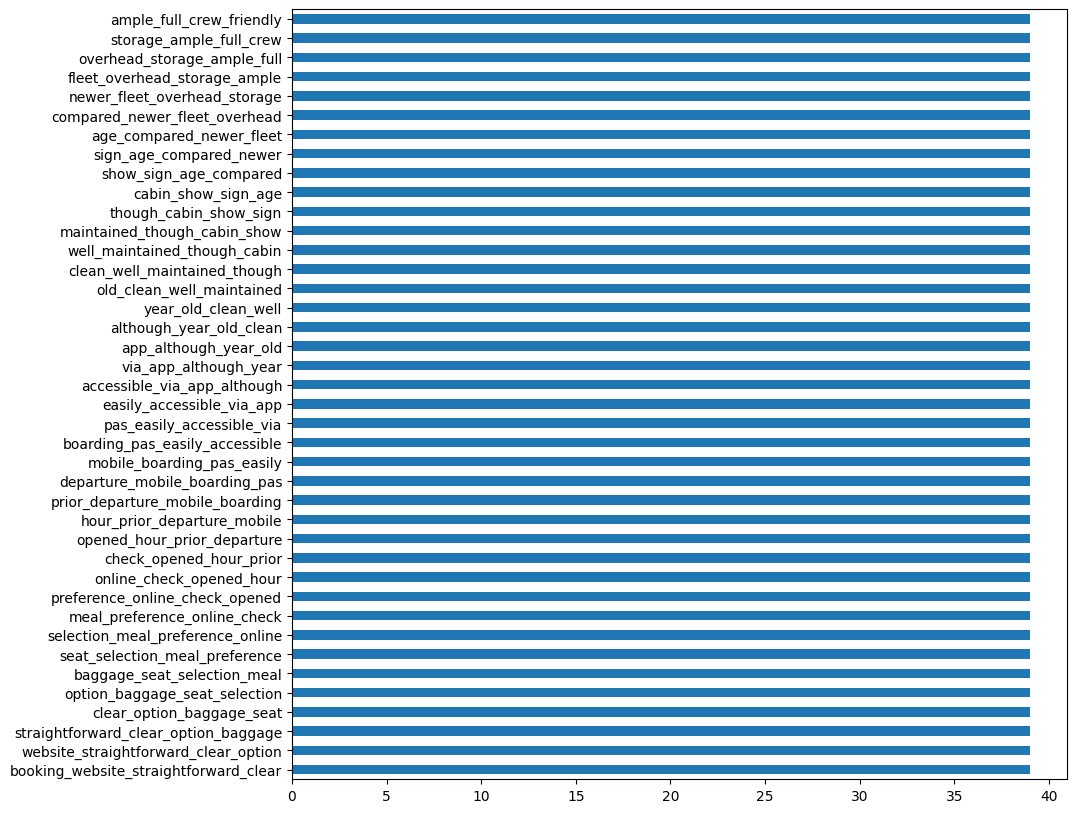

In [21]:
new_words_7_10 =[word for word in words_7_10 if word not in stopwords]
get_freq_dist(new_words_7_10,4)

<Axes: >

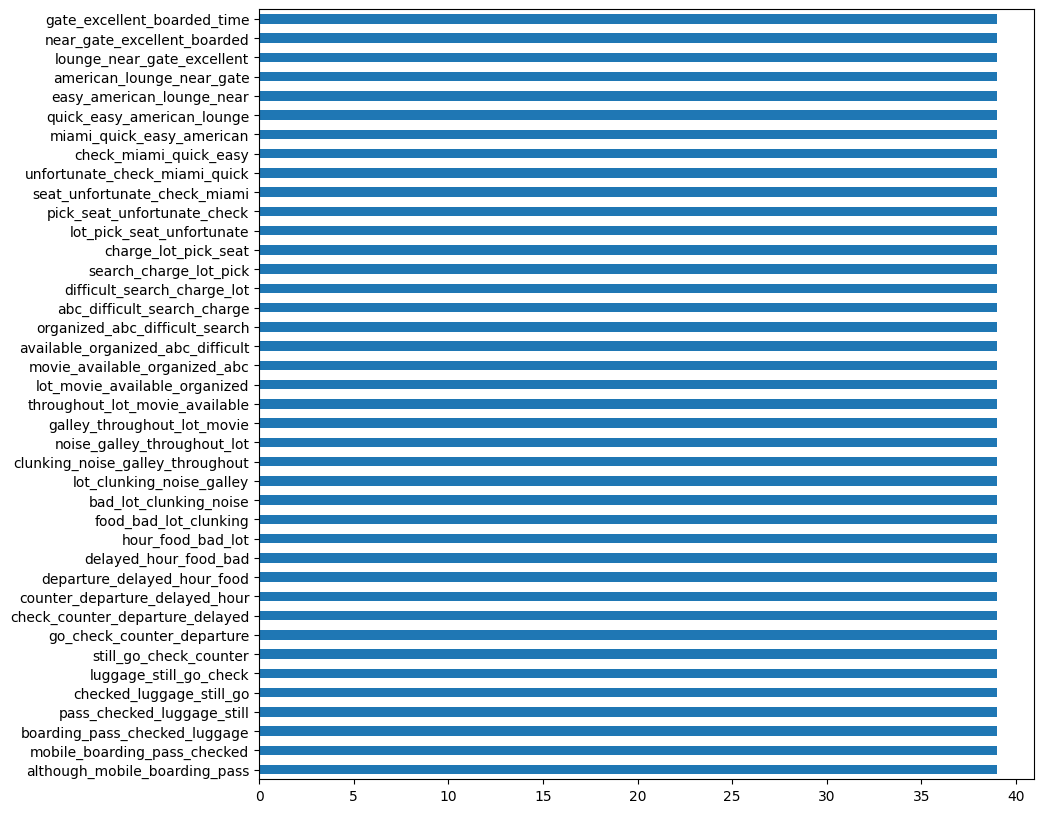

In [22]:
new_words = [word for word in words_4_6 if word not in stopwords]
get_freq_dist(new_words,4)

<Axes: >

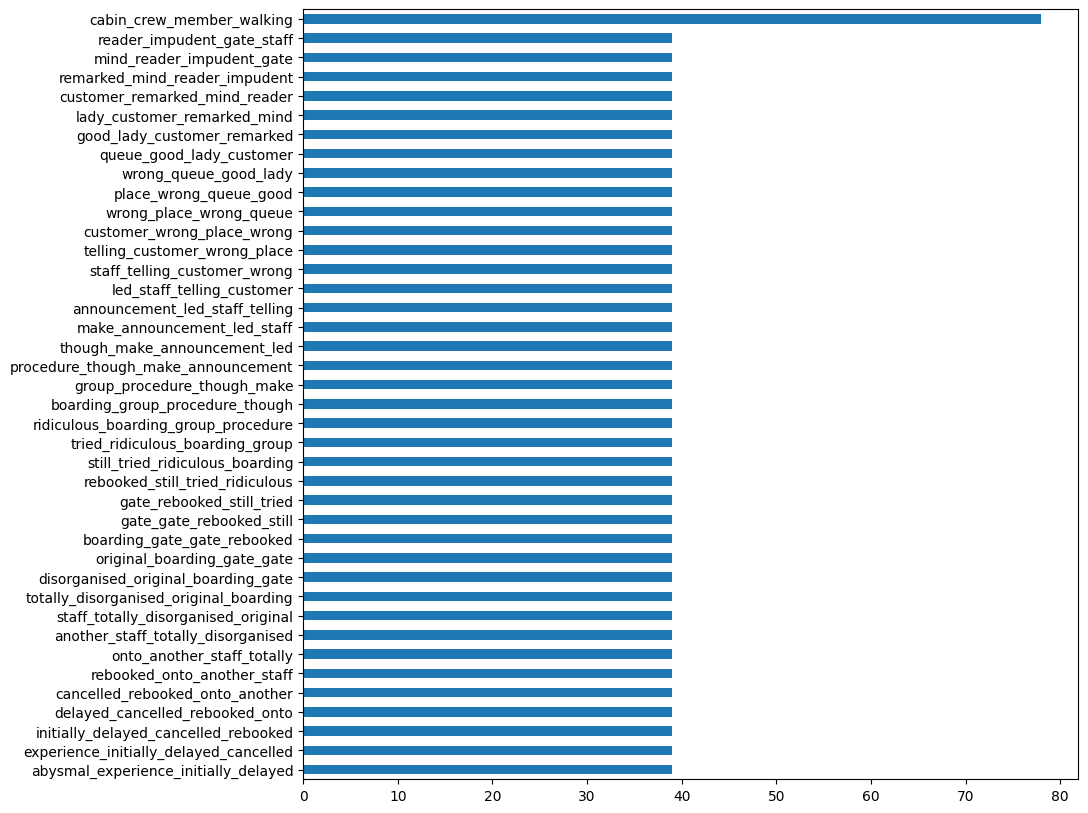

In [23]:
new_words = [word for word in words_1_3 if word not in stopwords]
get_freq_dist(new_words,4)

Now we will use textblob library to define if the text is negative or posotive and to what extend

In [24]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#polarity with all 0 values initially
df['polarity']= 0

for i in range(len(df.corpus)):
  sent= TextBlob(df.corpus[i])
  polarity= sent.sentiment.polarity
  subjectivity= sent.sentiment.subjectivity
  df['polarity'][i]= polarity

In [25]:
#lets see how many texts are with positive comments

print(f"{  df[  (df['polarity']>-0.2) & (df['polarity']<0.2) ].shape[0]  } number of reviews btw -0.2 and 0.2 polarity score")
print(f"{  df[  (df['polarity']>-0.1) & (df['polarity']<0.1)  ].shape[0]   } number of reviews btw -0.1 and 0.1 polarity score")


2613 number of reviews btw -0.2 and 0.2 polarity score
1794 number of reviews btw -0.1 and 0.1 polarity score


In [26]:
  >>> import nltk
  >>> nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [27]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
df["label"]=0
for i in range(len(df.corpus)):
   score=vds.polarity_scores(df.corpus[i])['compound']
   #print(score)
   if score>0.2:
    df['label'][i]=1
   elif score<0:
    df['label'][i]=-1
   else:
    df['label'][i]=0

In [28]:
df.label.value_counts()

,count
label,
1,1989
-1,1755
0,156


## Topic Modeling with LDA

We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [33]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
tf=vect.fit_transform(df.corpus).toarray()
tf_feature_names= vect.get_feature_names_out()

In [36]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topic=8

model=LatentDirichletAllocation(n_components= number_of_topic,random_state=0)

model.fit(tf)

#creating a empty list to store key value pair of topic number and its weights
topic_dict={}

#lopp through model components
for topic_idx,topic in enumerate(model.components_):
  topic_dict['Topic %d words'% (topic_idx)]=['{}'.format(tf_feature_names[i])
           for i in topic.argsort()[:-10 - 1:-1 ]]
  topic_dict['Topic %d weights'% (topic_idx)]=['{:.1f}'.format(topic[i])
           for i in topic.argsort()[:-10 -1:-1 ]]
df_topic= pd.DataFrame(topic_dict)

In [37]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,975.1,flight,884.9,flight,858.2,flight,1443.1,business,426.6,flight,1276.9,flight,1014.1,ba,1985.6
1,ba,819.1,cancelled,503.3,ba,507.1,ba,858.1,boarding,390.1,british,910.6,ba,702.1,flight,1347.3
2,cabin,546.1,seat,499.8,staff,351.1,good,780.1,class,371.6,airway,710.6,would,429.1,seat,1063.4
3,time,507.1,service,446.0,passenger,273.1,food,468.1,british,364.0,service,534.1,airline,390.1,crew,875.0
4,seat,429.1,day,350.0,one,273.1,crew,429.1,flight,352.3,minute,459.6,hour,390.1,service,845.8
5,service,429.1,claim,312.1,hour,234.1,passenger,351.1,seat,328.7,customer,444.9,told,312.1,time,819.1
6,crew,390.1,ba,276.6,water,234.1,lounge,351.1,airway,327.6,london,413.6,could,312.1,cabin,780.1
7,hour,390.1,could,260.8,gate,234.1,excellent,312.1,bag,312.1,ticket,384.2,johannesburg,273.1,food,695.1
8,would,390.1,customer,236.8,get,234.1,class,312.1,time,312.1,would,351.1,even,234.1,club,663.1
9,good,351.1,compensation,234.1,seat,234.1,service,312.1,verified,262.5,hour,345.0,rome,234.1,meal,624.1


but in this there are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.

Topic Modeling with NMF

In [38]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.09282667, 0.05388448],
       [0.08378324, 0.2361757 ],
       [0.18659086, 0.08552318],
       ...,
       [0.15783158, 0.21319184],
       [0.24028077, 0.01840858],
       [0.04594471, 0.22193963]])

In [39]:
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [40]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,12.0,ba,5.1
1,ba,4.9,good,4.1
2,would,4.1,time,3.5
3,hour,3.5,cabin,3.4
4,british,2.9,crew,2.9
5,service,2.6,seat,2.7
6,airway,2.6,food,2.5
7,customer,2.5,flight,2.4
8,could,2.5,lounge,2.3
9,day,2.5,service,2.1


With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again.